In [35]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

#for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
def plotsample(X, Y, index):
    plt.figure( figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

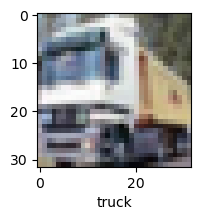

In [27]:
plotsample(X_train, y_train, 1)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
#ANN test

ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)), 
    layers.Dense(3000, activation = "relu"),
    layers.Dense(1000, activation = "relu"),
    layers.Dense(10, activation = "sigmoid")
])

ann.compile(
    optimizer = "SGD",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
ann.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8144 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6246 - accuracy: 0.4234
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5420 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4839 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4336 - accuracy: 0.4966


In [13]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4992 - accuracy: 0.4718


[1.499208927154541, 0.4717999994754791]

In [14]:
#CNN test

cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [15]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [37]:
cnn.fit(X_train, y_train, epochs = 10 )

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5929 - accuracy: 0.7913
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5627 - accuracy: 0.8023
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5356 - accuracy: 0.8128
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5094 - accuracy: 0.8203
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4854 - accuracy: 0.8292
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4627 - accuracy: 0.8357
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4449 - accuracy: 0.8437
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4267 - accuracy: 0.8478
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4061 - accuracy: 0.8563
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.386

In [17]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9333 - accuracy: 0.7000


[0.9333162903785706, 0.699999988079071]

In [19]:
y_predictions = cnn.predict(X_test)

313/313 [==============================] - 0s 976us/step


In [20]:
y_predictions[:5]

array([[1.1259408e-03, 9.5907220e-04, 1.0700846e-02, 9.2635268e-01,
        1.2095635e-03, 1.4828556e-02, 3.9875332e-02, 3.5444202e-04,
        4.5516170e-03, 4.1901414e-05],
       [2.7257521e-03, 2.6172626e-01, 1.6859796e-05, 4.9054556e-06,
        8.2679286e-09, 6.8842261e-09, 2.2804818e-07, 1.4942691e-07,
        7.3513210e-01, 3.9376822e-04],
       [2.4944019e-01, 2.7673665e-01, 7.6216063e-03, 1.3658474e-02,
        3.7172756e-03, 4.8351989e-04, 7.3135778e-04, 2.5078746e-02,
        3.5491472e-01, 6.7617476e-02],
       [5.7771385e-01, 2.3102878e-01, 2.4271769e-02, 1.9511484e-03,
        8.7585492e-04, 9.0906760e-06, 9.5512503e-04, 5.3699280e-04,
        1.4578065e-01, 1.6876722e-02],
       [1.5495526e-06, 7.3479016e-05, 5.3730896e-03, 3.9073814e-02,
        3.7520923e-02, 4.4256734e-04, 9.1733497e-01, 2.8272440e-05,
        1.4963152e-04, 1.5563210e-06]], dtype=float32)

In [21]:
y_classes = [np.argmax(i) for i in y_predictions]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [24]:
def verifSample(index):
    print(classes[y_test[index]])

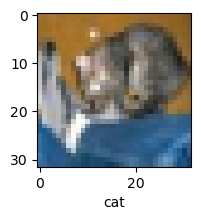

In [34]:
plotsample(X_test, y_test, 0)

In [32]:
classes[y_classes[0]]

'cat'